In [3]:
# Let's first inspect the uploaded dataset to understand its structure
import pandas as pd

# Load the dataset
file_path = 'products.csv'
data = pd.read_csv(file_path)

# Display the first few rows and columns of the dataset to understand its structure
data.head(), data.columns


(   Household  \
 0  Household   
 1  Household   
 2  Household   
 3  Household   
 4  Household   
 
   Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style 

In [2]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install pandas matplotlib scikit-learn plotly fastapi uvicorn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

# Load the dataset (replace 'your_path' with the actual file path)
data = pd.read_csv('products.csv')

# Rename columns for easier access
data.columns = ['Category', 'Product_Description']

# Display first few rows to ensure it's loaded correctly
print(data.head())


    Category                                Product_Description
0  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
1  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
2  Household  SAF Flower Print Framed Painting (Synthetic, 1...
3  Household  Incredible Gifts India Wooden Happy Birthday U...
4  Household  Pitaara Box Romantic Venice Canvas Painting 6m...


In [6]:
import plotly.express as px

# Get category count
category_count = data['Category'].value_counts()

# Plot the distribution of categories
fig = px.bar(category_count, x=category_count.index, y=category_count.values,
             labels={'x':'Product Category', 'y':'Count'},
             title="Distribution of Product Categories")
fig.show()


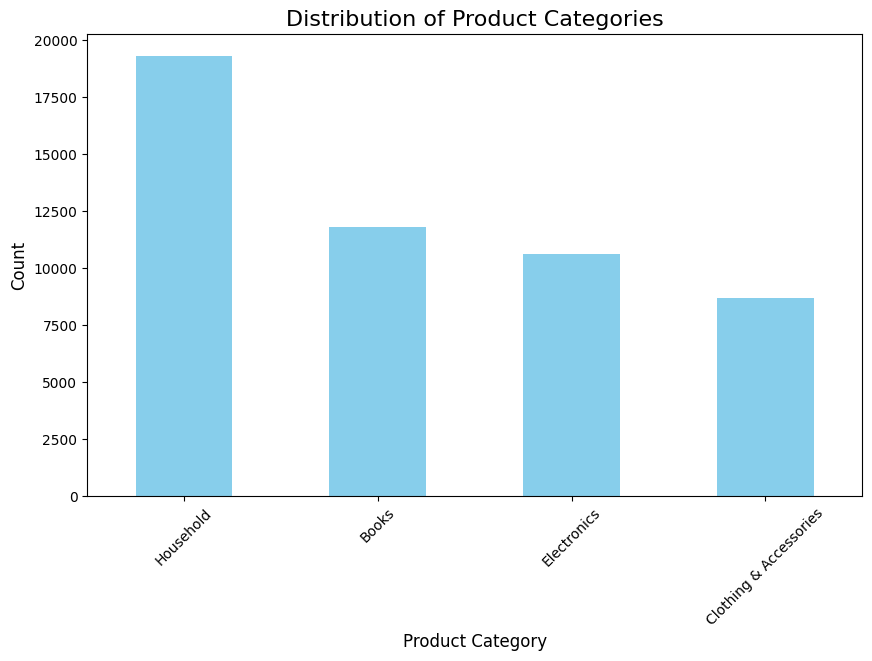

In [7]:
import matplotlib.pyplot as plt

# Plot category distribution
plt.figure(figsize=(10, 6))
category_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Fill missing product descriptions with an empty string
data['Product_Description'] = data['Product_Description'].fillna('')

# Preprocessing: Convert text to vectors (TF-IDF)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Product_Description'])

# Encode the labels (categories)
le = LabelEncoder()
y = le.fit_transform(data['Category'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2379
           1       0.97      0.97      0.97      1750
           2       0.98      0.95      0.96      2082
           3       0.96      0.98      0.97      3874

    accuracy                           0.97     10085
   macro avg       0.97      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085

Accuracy: 0.97


In [13]:
# Function to predict category of a given product description
def predict_category(description):
    # Preprocess the input description
    description_tfidf = tfidf.transform([description])
    # Predict the category
    prediction = model.predict(description_tfidf)
    # Convert the label back to category name
    category = le.inverse_transform(prediction)[0]
    return category

# Example usage
if __name__ == "__main__":
    # Prompt the user for a product description
    new_description = input("Enter a product description to classify: ")
    # Predict the category
    predicted_category = predict_category(new_description)
    print(f"The predicted category is: {predicted_category}")


The predicted category is: Electronics


In [16]:
while True:
    new_description = input("Enter a product description to classify (or type 'exit' to quit): ")
    if new_description.lower() == 'exit':
        break
    predicted_category = predict_category(new_description)
    print(f"The predicted category is: {predicted_category}\n")

The predicted category is: Household

The predicted category is: Clothing & Accessories

The predicted category is: Electronics

The predicted category is: Electronics



In [15]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Assuming `le` is your label encoder
joblib.dump(le, 'label_encoder.pkl')


# Assuming `model` is your trained model and `tfidf` is the vectorizer
joblib.dump(model, 'product_classifier_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')



['tfidf_vectorizer.pkl']